In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

### Titles, text, annotations, arrows

Dataset can be downloaded from
https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv.

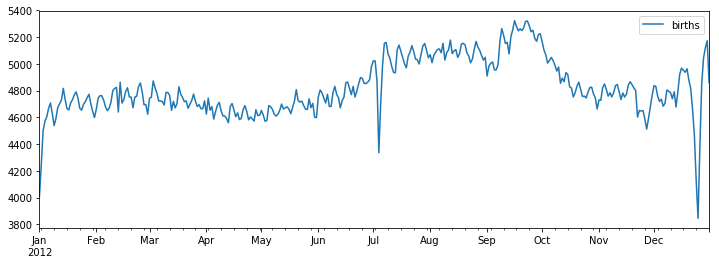

In [87]:
import pandas as pd

births = pd.read_csv('births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])

mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int) 

births.index = pd.to_datetime(10000 * births.year +
100 * births.month +
births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
[births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
for (month, day) in births_by_date.index]
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

In [86]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


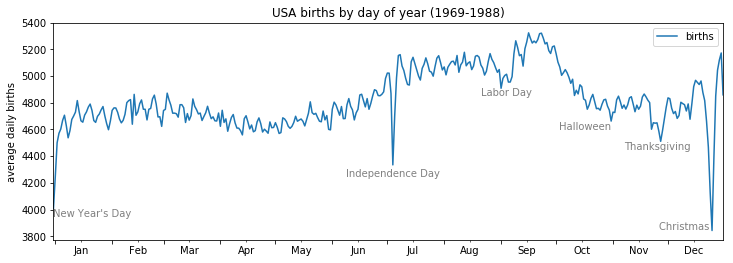

In [47]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)
# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
ylabel='average daily births')
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

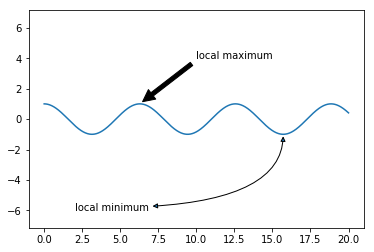

In [90]:
fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),

arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),

arrowprops=dict(arrowstyle="<|-|>",
connectionstyle="angle3,angleA=0,angleB=-90"));

In [55]:
# Fancy ticks

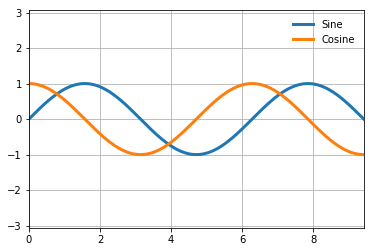

In [88]:
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')
# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

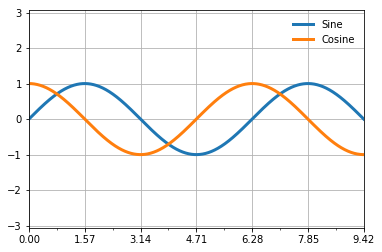

In [58]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

In [59]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

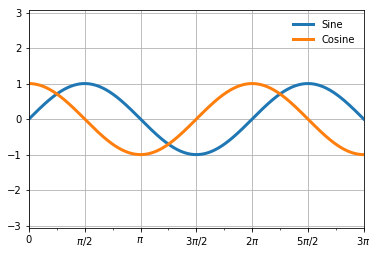

In [60]:
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

### Subplots

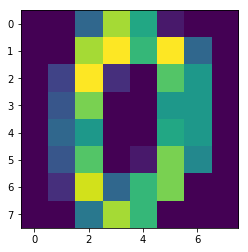

In [4]:
from sklearn.datasets import load_digits
mnist = load_digits()
digits = mnist.images
digits.shape
plt.imshow(digits[0])

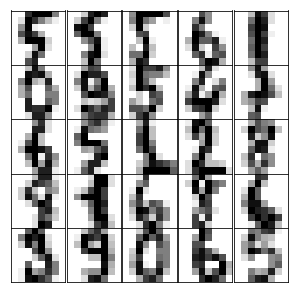

In [97]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)
n = np.random.randint(digits.shape[0], size=(len(ax.flat), 1)) 

cnt = 0

for i in range(5):
    for j in range(5):
#         ax[i, j].xaxis.set_major_locator(plt.NullLocator())
#         ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(digits[n[cnt],:,:].squeeze(), cmap="binary")
        cnt += 1

In [114]:
len(ax.flat)

25

In [107]:
n

array([[ 679],
       [1659],
       [1259],
       [ 871],
       [1107],
       [1677],
       [ 491],
       [ 488],
       [1355],
       [ 240],
       [ 880],
       [1702],
       [ 558],
       [ 907],
       [ 404],
       [1468],
       [  21],
       [ 921],
       [1080],
       [1749],
       [ 399],
       [1792],
       [ 334],
       [1321],
       [ 549]])